## 데이터 확인 및 전처리

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('./pima_diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
# 0은 음성, 1은 양성
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [32]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
feature = df.iloc[:,:-1]
target = df['Outcome']

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.3)

## 모델 별 학습 & 예측

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
knn_clf.fit(x_train, y_train)
lr_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)

knn_pred = knn_clf.predict(x_test)
lr_pred = lr_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)

print(f'KNN 정확도:{accuracy_score(y_test, knn_pred)}')
print(f'Logistic Regression 정확도:{accuracy_score(y_test, lr_pred)}')
print(f'Random Forest 정확도:{accuracy_score(y_test, rf_pred)}')

KNN 정확도:0.6926406926406926
Logistic Regression 정확도:0.7662337662337663
Random Forest 정확도:0.7489177489177489


c:\users\clee0\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 정밀도 & 재현율 확인

### Confusion Matrix 확인

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [45]:
cm = confusion_matrix(y_test, knn_pred)

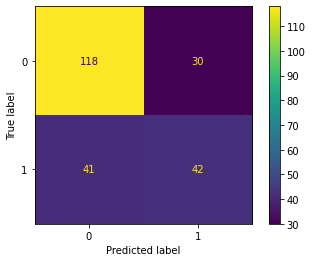

In [49]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### 정밀도, 재현율, F1, ROC, AUC

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [51]:
knn_clf.predict_proba(x_test)

array([[0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. ,

In [59]:
def get_eval(classifier, x_test, y_test):
    pred = classifier.predict(x_test)
    pred_proba = classifier.predict_proba(x_test)
    
    plt.subplot(1,2,1)
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    
    plt.subplot(1,2,2)
    fpr, tpr, threshold = roc_curve(y_test, pred_proba)
    plt.plot(fpr , tpr, label='ROC')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    
    plt.show()
    
    print(f'정확도 : {accuracy_score(y_test, pred)}')
    print(f'정밀도 : {precision_score(y_test, pred)}')
    print(f'재현율 : {recall_score(y_test, pred)}')
    print(f'F1 : {f1_score(y_test, pred)}')
    print(f'AUC : {roc_auc_score(y_test, pred)}')

ValueError: y should be a 1d array, got an array of shape (231, 2) instead.

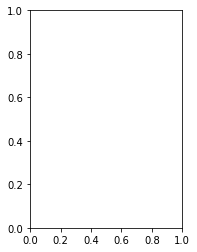

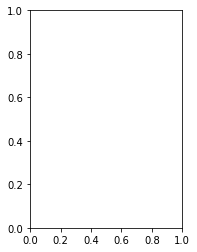

In [60]:
get_eval(knn_clf, x_test, y_test)